# EDA

In [ ]:
import pandas as pd
import os
import numpy as np

path= "../../Base_de_datos.xlsx"
if os.path.exists(path):
    df = pd.read_excel(path)
    df.head()
else:    print("El archivo no existe.")


   tipo_credito      fecha_prestamo  capital_prestado  plazo_meses  \
0             7 2024-12-21 11:31:35         3692160.0           10   
1             4 2025-04-22 09:47:35          840000.0            6   
2             9 2026-01-08 12:22:40         5974028.4           10   
3             4 2025-08-04 12:04:10         1671240.0            6   
4             9 2025-04-26 11:24:26         2781636.0           11   

   edad_cliente   tipo_laboral  salario_cliente  total_otros_prestamos  \
0            42  Independiente          8000000                2500000   
1            60       Empleado          3000000                2000000   
2            36  Independiente          4036000                 829000   
3            48       Empleado          1524547                 498000   
4            44       Empleado          5000000                4000000   

   cuota_pactada    puntaje  ...  saldo_mora  saldo_total  saldo_principal  \
0         341296  88.768094  ...         0.0      51258.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [15]:
df_eda= df.copy()
df_eda.head()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [8]:
nulos = df_eda.isnull().sum()
print(nulos[nulos > 0])

puntaje_datacredito                 6
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
dtype: int64


In [9]:
df_eda.replace(["","N/A","None","NaN"], np.nan, inplace=True)

In [19]:
df_eda['Pago_atiempo'] = df_eda['Pago_atiempo'].astype('bool') 
df_eda['tipo_credito'] = df_eda['tipo_credito'].astype('category') 
df_eda['tipo_laboral'] = df_eda['tipo_laboral'].astype('category') 

In [22]:
df_eda.describe()

,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito
count,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03
mean,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06
min,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05
50%,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06
75%,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06
max,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07
std,NaN,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06


In [20]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  category      
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  category      
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

## Tratamiento de datos

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
estadisticos_num = df_eda.describe().T
estadisticos_num['skewness'] = df_eda.select_dtypes(include=[np.number]).skew()
estadisticos_num['kurtosis'] = df_eda.select_dtypes(include=[np.number]).kurt()

In [27]:
estadisticos_num

,count,mean,min,25%,50%,75%,max,std,skewness,kurtosis
fecha_prestamo,10763,2025-04-16 23:06:02.111121664,2024-11-26 09:17:04,2025-01-20 17:33:07.500000,2025-03-27 16:23:12,2025-06-16 13:27:58,2026-04-26 18:43:52,NaN,NaN,NaN
capital_prestado,10763.0,2434315.001319,360000.0,1224831.0,1921920.0,3084840.0,41444152.8,1909642.758997,3.723884,35.318092
plazo_meses,10763.0,10.575583,2.0,6.0,10.0,12.0,90.0,6.632082,2.459691,7.780121
edad_cliente,10763.0,43.94862,19.0,33.0,42.0,53.0,123.0,15.060877,1.934399,7.868936
salario_cliente,10763.0,17216431.459909,0.0,2000000.0,3000000.0,4875808.0,22000000000.0,355476717.603482,43.776664,2211.230120
total_otros_prestamos,10763.0,6238869.648518,0.0,500000.0,1000000.0,2000000.0,6787675263.0,118418316.941069,38.463886,1719.280871
cuota_pactada,10763.0,243617.406671,23944.0,121041.5,182863.0,287833.5,3816752.0,210493.694608,3.793301,26.650757
puntaje,10763.0,91.170036,-38.00999,95.227787,95.227787,95.227787,95.227787,16.465441,-4.865607,24.081011
puntaje_datacredito,10757.0,780.790834,-7.0,757.0,791.0,825.0,999.0,104.878031,-5.644513,39.437798
cant_creditosvigentes,10763.0,5.726749,0.0,3.0,5.0,8.0,62.0,3.977162,1.797738,8.623346


In [37]:
def filtrar_outliers(df_eda, columna, percentil=0.99):
    limite_superior = df_eda[columna].quantile(percentil)
    df[columna] = df_eda[columna].clip(upper=limite_superior)
    return df_eda

columnas_extremas = ['salario_cliente', 'total_otros_prestamos', 'capital_prestado', 'saldo_total']
for col in columnas_extremas:
    df_eda = filtrar_outliers(df_eda, col, 0.99)

df_eda['edad_cliente'] = df_eda['edad_cliente'].clip(upper=90)
df_eda["salario_cliente"] = df_eda["salario_cliente"].clip(upper=df_eda["salario_cliente"].quantile(0.95))
df_eda["total_otros_prestamos"] = df_eda["total_otros_prestamos"].clip(upper=df_eda["total_otros_prestamos"].quantile(0.95))
df_eda["promedio_ingresos_datacredito"] = df_eda["promedio_ingresos_datacredito"].clip(upper=df_eda["promedio_ingresos_datacredito"].quantile(0.90))
df_eda.loc[df_eda["puntaje"]<0, "puntaje"] = df_eda["puntaje"].median()

In [38]:
#------------------------------------------
df_eda['salario_cliente'] = df_eda['salario_cliente'].replace(0, np.nan)
mediana_sal = df_eda['salario_cliente'].median()
df_eda['salario_cliente'] = df_eda['salario_cliente'].fillna(mediana_sal)
#------------------------------------------
df_eda['promedio_ingresos_datacredito'] = df_eda['promedio_ingresos_datacredito'].replace(0, np.nan)
mediana_ing = df_eda['promedio_ingresos_datacredito'].median()
df_eda['promedio_ingresos_datacredito'] = df_eda['promedio_ingresos_datacredito'].fillna(mediana_ing)
#------------------------------------------
df_eda.loc[df_eda['puntaje_datacredito'] < 0, 'puntaje_datacredito'] = np.nan
mediana_puntaje = df_eda['puntaje_datacredito'].median()
df_eda['puntaje_datacredito'] = df_eda['puntaje_datacredito'].fillna(mediana_puntaje)
#------------------------------------------
df_eda['saldo_mora'] = df_eda['saldo_mora'].fillna(0) 
df_eda['saldo_total'] = df_eda['saldo_total'].fillna(df_eda['saldo_total'].median())
df_eda['saldo_principal'] = df_eda['saldo_principal'].fillna(df_eda['saldo_principal'].median())


In [39]:
estadisticos_num = df_eda.describe().T
estadisticos_num['skewness'] = df_eda.select_dtypes(include=[np.number]).skew()
estadisticos_num['kurtosis'] = df_eda.select_dtypes(include=[np.number]).kurt()
estadisticos_num

,count,mean,min,25%,50%,75%,max,std,skewness,kurtosis
fecha_prestamo,10763,2025-04-16 23:06:02.111121664,2024-11-26 09:17:04,2025-01-20 17:33:07.500000,2025-03-27 16:23:12,2025-06-16 13:27:58,2026-04-26 18:43:52,NaN,NaN,NaN
capital_prestado,10763.0,2434315.001319,360000.0,1224831.0,1921920.0,3084840.0,41444152.8,1909642.758997,3.723884,35.318092
plazo_meses,10763.0,10.575583,2.0,6.0,10.0,12.0,90.0,6.632082,2.459691,7.780121
edad_cliente,10763.0,43.502834,19.0,33.0,42.0,53.0,90.0,13.088475,0.701906,0.657674
salario_cliente,10763.0,3698801.609588,1000.0,2000000.0,3000000.0,4875808.0,10000000.0,2368428.164564,1.332937,1.128333
total_otros_prestamos,10763.0,1361623.297315,0.0,500000.0,1000000.0,2000000.0,4798729.0,1220166.356906,1.381369,1.344820
cuota_pactada,10763.0,243617.406671,23944.0,121041.5,182863.0,287833.5,3816752.0,210493.694608,3.793301,26.650757
puntaje,10763.0,92.502146,0.050943,95.227787,95.227787,95.227787,95.227787,11.752393,-5.380613,30.257018
puntaje_datacredito,10763.0,780.870668,0.0,757.0,791.0,825.0,999.0,104.573722,-5.653315,39.627826
cant_creditosvigentes,10763.0,5.726749,0.0,3.0,5.0,8.0,62.0,3.977162,1.797738,8.623346


## Analisis Univariable

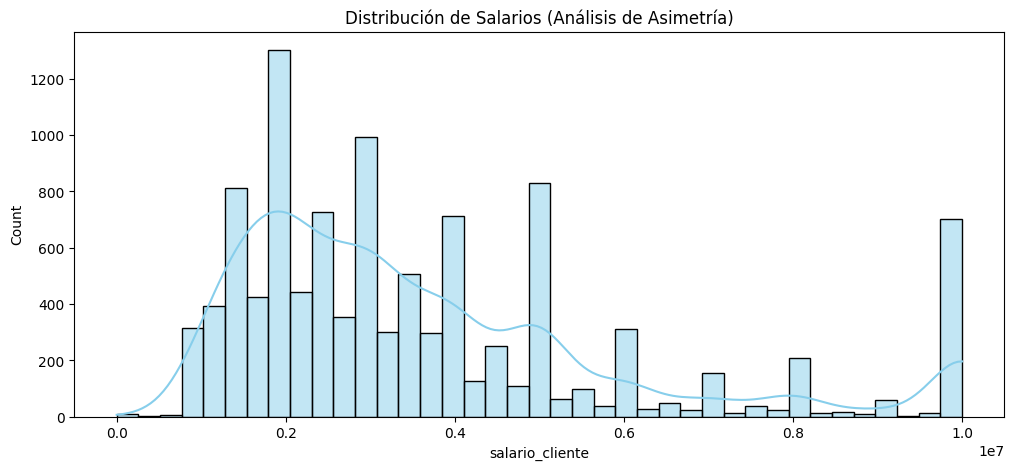

In [41]:
plt.figure(figsize=(12, 5))
sns.histplot(df_eda["salario_cliente"], kde=True, color='skyblue')
plt.title('Distribución de Salarios (Análisis de Asimetría)')
plt.show()

## Analisis Bivariable

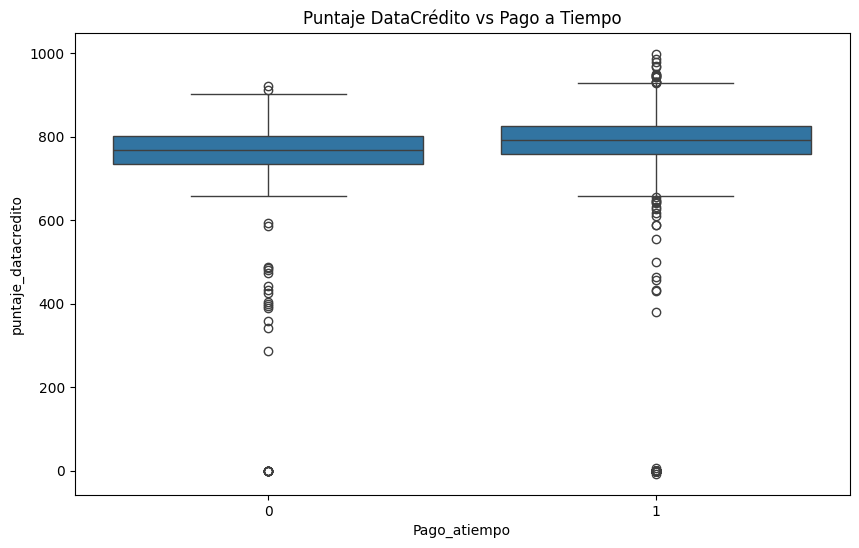

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pago_atiempo', y='puntaje_datacredito', data=df)
plt.title('Puntaje DataCrédito vs Pago a Tiempo')
plt.show()

## multicolinearidad

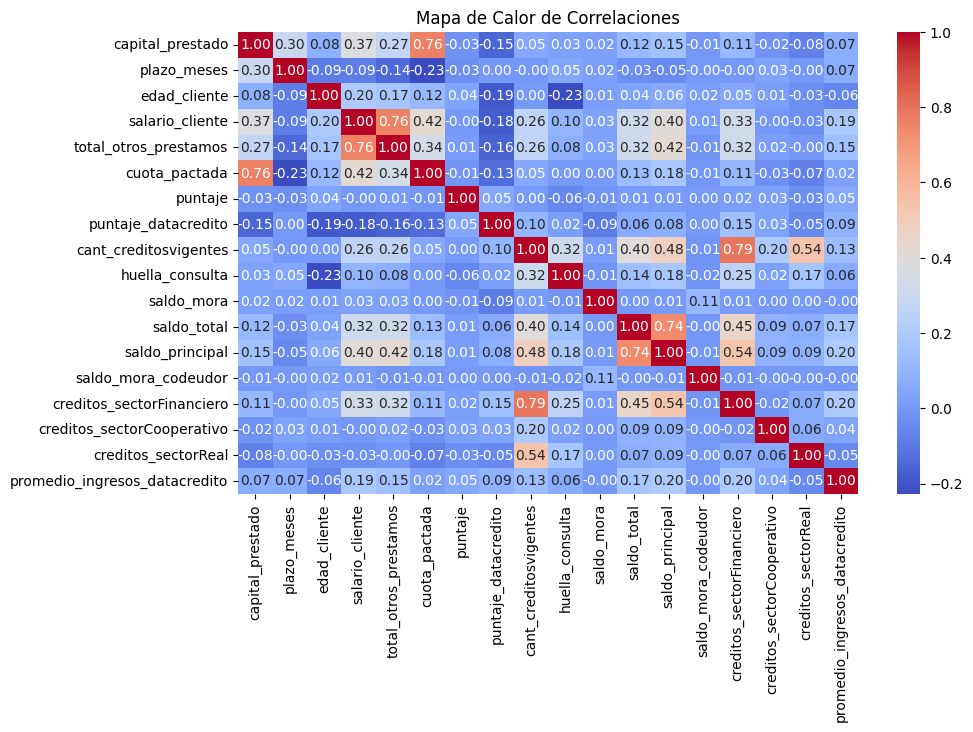

In [42]:
plt.figure(figsize=(10, 6))
correlacion= df_eda.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()